In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ddpi # this is the ddpi python library
import time

print(cv2.__version__)

4.6.0


In [7]:
ds = 2 # downsample factor
P1THRESH = 50 # 
GBLUR = 25 # Blur amount on raw image
P1WIN = 32 # halfwidth of the P1 ROI
P4WIN = 16 # halfwidth of the P4 ROI

#% Run analysis
fname = '/Users/jake/Documents/mouse-eye-tracking/video/2p-03102023125531-0000.avi' # put path to your file here
cap = cv2.VideoCapture(fname)


ret, imraw = cap.read()

[ WARN:0@409.149] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@409.149] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'


OpenCV: Couldn't read movie file "/Users/jake/Documents/mouse-eye-tracking/video/2p-03102023125531-0000.avi"
[ERROR:0@409.158] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.

In [5]:
# Preallocate 
width  = int(cap.get(3))  # float `width`
height = int(cap.get(4))  # float `height`
sz = (height, width)
im = np.zeros(sz,np.uint8)
P1ROI = np.zeros((P1WIN*2, P1WIN*2), np.float32)
P4ROI = np.zeros((P4WIN*2, P4WIN*2), np.float32)

[ WARN:0@158.247] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@158.247] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'


OpenCV: Couldn't read movie file "/Users/jake/Documents/mouse-eye-tracking/video/2p-03102023132053-0000.avi"
[ERROR:0@158.254] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.

In [2]:
ret, imraw = cap.read()

In [2]:
# Output file
# fourcc = cv2.VideoWriter_fourcc('M','J','P','G') # won't work on macosx
fourcc = cv2.VideoWriter_fourcc('m','p','4','v') # mp4v works on most systems

out = cv2.VideoWriter(fname[:-4] + '_tracked.mp4',fourcc, 30, (width,height))

ret, imraw = cap.read()
if not ret:
    print("video read is broken")

framenum = 1
maxFrames = 2000
eyetrack = np.zeros( (maxFrames, 6)) # time, p1x, p1y, p4x, p4y, duration
print("Running DDPI on %d frames from video" %maxFrames)
while(True):
    # print(framenum)
    ret, imraw = cap.read()
    
    if ret == True and framenum < maxFrames:
        t0 = time.time()
        try:

            P1X, P1Y, P4X, P4Y = ddpi.ddpi_pupil_thresh(imraw, P1ROI, P4ROI, sz,
                P1THRESH, GBLUR, ds, P1WIN, P4WIN)

        except:
            P1X = 0
            P1Y = 0
            P4X = 0
            P4Y = 0
        
        t1 = time.time()
        eyetrack[framenum,0] = t0
        eyetrack[framenum,1] = P1X
        eyetrack[framenum,2] = P1Y
        eyetrack[framenum,3] = P4X
        eyetrack[framenum,4] = P4Y
        eyetrack[framenum,5] = t1-t0

        # draw to video
        output = cv2.circle(imraw, center=(int(P1X),int(P1Y)), radius=10, color=(255,0,0), thickness=5)
        output = cv2.circle(output, center=(int(P4X),int(P4Y)), radius=10, color=(0,255,0), thickness=5)
        out.write(output)
        
        framenum += 1
    else:
        break
    
cap.release()
out.release()

print("Done")

video read is broken
Running DDPI on 2000 frames from video
Done


[ WARN:0@24.912] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@24.913] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'


OpenCV: Couldn't read movie file "/Users/jake/Documents/mouse-eye-tracking/video/2p-03102023132053-0000.avi"
[ERROR:0@25.012] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_5a1v4y7k9y/croot/opencv-suite_1676472757237/work/modules/videoio/src/cap.cpp

## get the eye traces

Text(0.5, 0, 'frame duration (ms)')

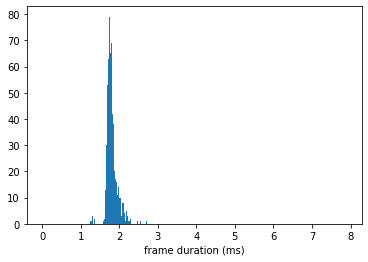

In [4]:
P4x = eyetrack[:,3]
P1x = eyetrack[:,1]
P4y = eyetrack[:,4]
P1y = eyetrack[:,2]

eyeX = P4x - P1x
eyeY = P4y - P1y

iix = np.arange(0, 200) # initial index 500 samples

plt.figure()
f = plt.hist(eyetrack[:,5]*1e3, 1000)
plt.xlabel("frame duration (ms)")

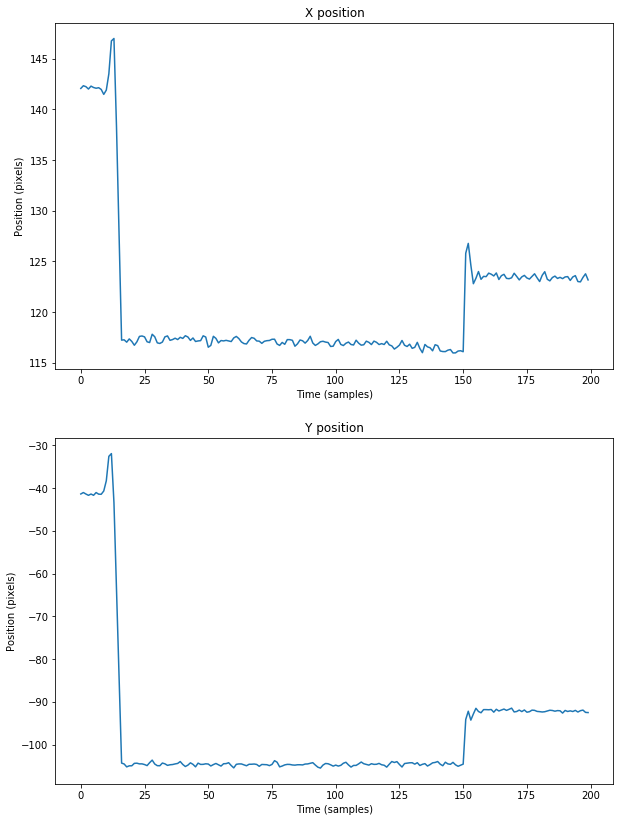

In [21]:
plt.figure(figsize=(10,14))
plt.subplot(2,1,1)
plt.plot(eyeX[iix])
plt.ylabel("Position (pixels)")
plt.xlabel("Time (samples)")
plt.title("X position")
plt.subplot(2,1,2)
plt.plot(eyeY[iix])
plt.ylabel("Position (pixels)")
plt.xlabel("Time (samples)")
plt.title("Y position")
iix += 100
if np.max(iix) > maxFrames:
    iix = np.arange(0,500)

    

## Plot the first purkinje image

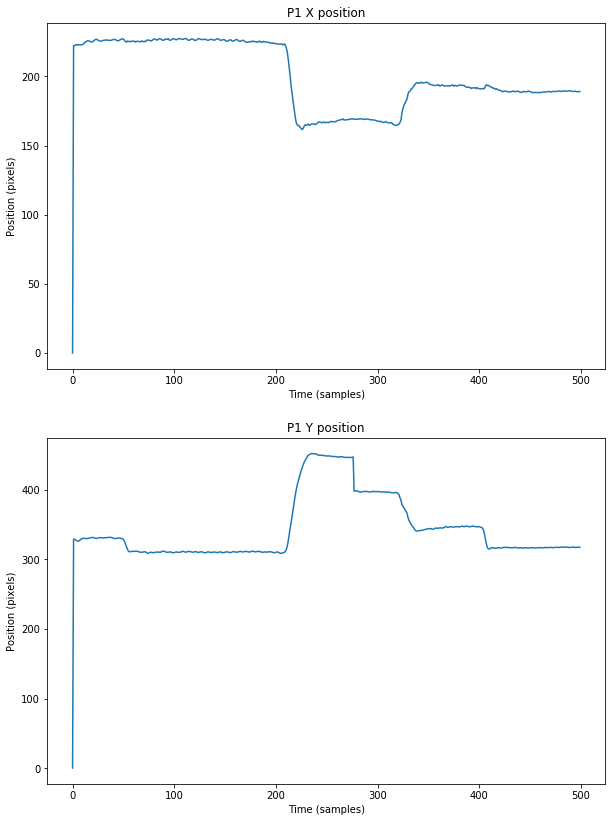

In [27]:
plt.figure(figsize=(10,14))
plt.subplot(2,1,1)
plt.plot(P1x[iix])
plt.ylabel("Position (pixels)")
plt.xlabel("Time (samples)")
plt.title("P1 X position")
plt.subplot(2,1,2)
plt.plot(P1y[iix])
plt.ylabel("Position (pixels)")
plt.xlabel("Time (samples)")
plt.title("P1 Y position")
iix += 100
if np.max(iix) > maxFrames:
    iix = np.arange(0,500)
    
    

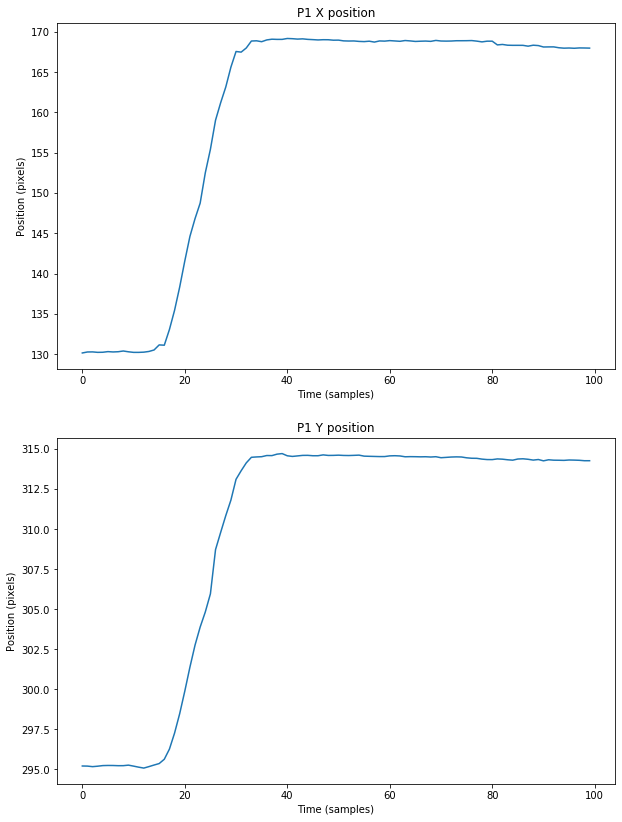

## One frame at a time

In [7]:
cap = cv2.VideoCapture(fname)

Text(0.5, 1.0, 'P4')

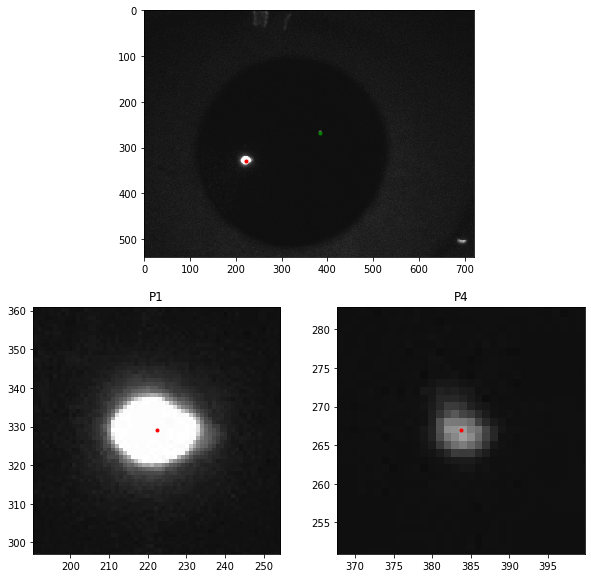

In [9]:
ret, imraw = cap.read()
    
if ret == True:
    P1X, P1Y, P4X, P4Y = ddpi.ddpi_pupil_thresh(imraw, P1ROI, P4ROI, sz,
        P1THRESH, GBLUR, ds, P1WIN, P4WIN)
    
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(imraw)
plt.plot(P1X, P1Y, '.r')
plt.plot(P4X, P4Y, '.g')

plt.subplot(2,2,3)
plt.imshow(imraw)
plt.plot(P1X, P1Y, '.r')
plt.xlim((P1X-P1WIN,P1X+P1WIN))
plt.ylim((P1Y-P1WIN,P1Y+P1WIN))
plt.title('P1')

plt.subplot(2,2,4)
plt.imshow(imraw)
plt.plot(P4X, P4Y, '.r')
plt.xlim((P4X-P4WIN,P4X+P4WIN))
plt.ylim((P4Y-P4WIN,P4Y+P4WIN))
plt.title('P4')

